In [147]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [148]:
# Load the chessboard image
image = cv2.imread('image.png')

scale = 0.5
width = int(image.shape[1] * scale)
height = int(image.shape[0] * scale)

image = cv2.resize(image, (width, height))
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [149]:
blurred = cv2.GaussianBlur(gray, (5, 5), 1)

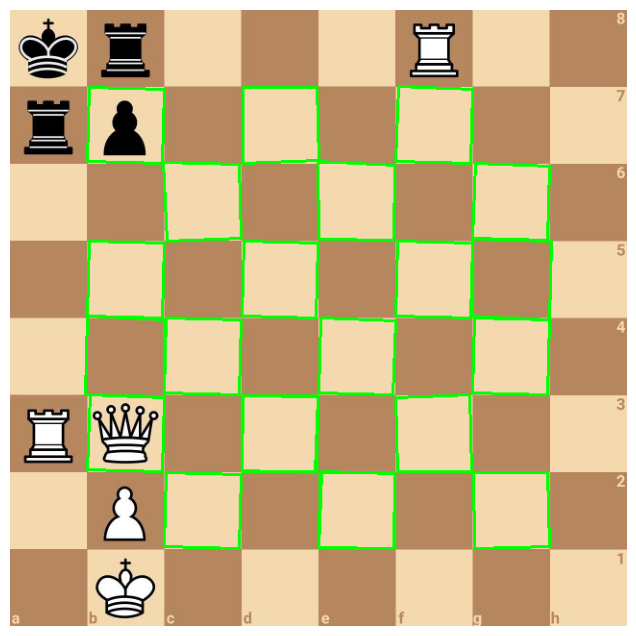

In [170]:
# Use Hough Line Transform to detect lines in the image
edges = cv2.Canny(blurred, 60, 200, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=10)
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = image.copy()


# Create a copy of the original image to draw lines on
image_with_lines = image.copy()

for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.15 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # We're looking for quadrilaterals (4-sided polygons)
    if len(approx) == 4:
        # Optionally, filter by area to avoid small contours
        area = cv2.contourArea(contour)
        if 1000 < area < 10000:  # Filter for reasonable square sizes
            cv2.drawContours(img_contours, [approx], -1, (0, 255, 0), 2)

# Show the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [174]:
import torch
import cv2

# Load a pre-trained YOLOv5 model (fine-tuned for chess piece detection)
model = torch.hub.load('ultralytics/yolov5')  # 'best.pt' is your trained model

# Load the chessboard image
img = cv2.imread('chessboard_image.png')

# Perform inference on the image
results = model(img)

# Get the detected results (bounding boxes, labels, and confidences)
detections = results.xyxy[0]  # Bounding boxes and labels

# Display the image with bounding boxes
results.show()

# Loop through detected chess pieces
for det in detections:
    x1, y1, x2, y2, conf, cls = det  # Bounding box coordinates and label
    label = model.names[int(cls)]  # Convert class index to label name (e.g., 'rook', 'queen')
    
    print(f"Detected: {label} at [{x1}, {y1}, {x2}, {y2}] with confidence {conf}")


TypeError: load() missing 1 required positional argument: 'model'